<a href="https://colab.research.google.com/github/gene-999/image-processing/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


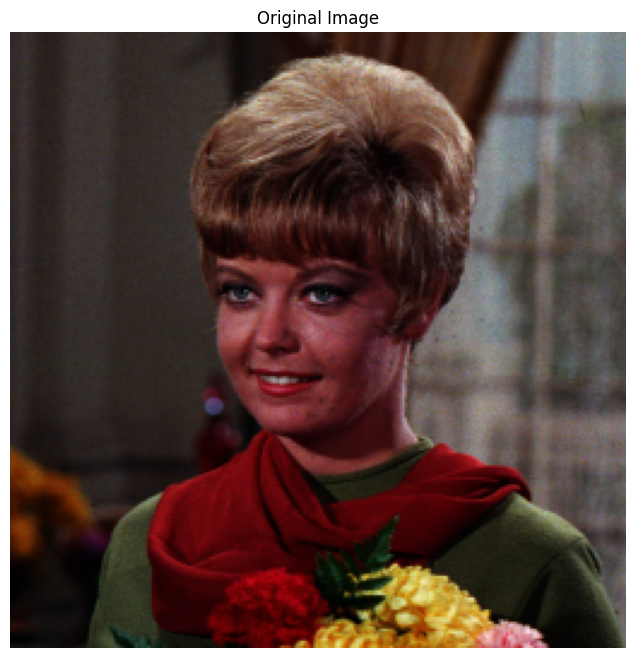

In [9]:
from google.colab import drive
drive.mount('/content/drive')

!pip install opencv-python numpy matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

# On Colab right now, kindly replace with commented version when you are running locally
image_path = '/content/drive/MyDrive/DCIT_407_IMAGES/4.1.01.tiff'
# image_path = '/images/4.1.01.tiff'

# Load the image
img_bgr = cv2.imread(image_path)

# Check if the image was loaded successfully
if img_bgr is None:
    print(f"Error: Could not load image from {image_path}. Please check the path and file name in your Google Drive.")
else:
    # Convert the image from BGR to RGB format
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Display the loaded RGB image
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off') # Hide axes for a cleaner look
    plt.show()

## Theoretical Background of Frequency Domain Image Processing

Frequency domain image processing involves transforming an image from its spatial domain representation to its frequency domain representation. This transformation allows us to analyze and manipulate the image based on its frequency components, which correspond to the rate of change of pixel intensity.

### The Fourier Transform

The Fourier Transform is a mathematical tool that decomposes a function (in our case, an image) into its constituent frequencies. For a continuous 2D image function $f(x, y)$, its 2D Continuous Fourier Transform (CFT) is given by:

$$F(u, v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) e^{-j2\pi(ux + vy)} dx dy$$

where:
- $f(x, y)$ is the image intensity at spatial coordinates $(x, y)$.
- $F(u, v)$ is the image in the frequency domain at frequency coordinates $(u, v)$.
- $u$ and $v$ represent spatial frequencies in the x and y directions, respectively.
- $j$ is the imaginary unit.

For digital images, we use the Discrete Fourier Transform (DFT). For an $M \times N$ image $f(x, y)$, the 2D DFT is:

$$F(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) e^{-j2\pi(\frac{ux}{M} + \frac{vy}{N})}$$

And the Inverse Discrete Fourier Transform (IDFT) to convert back to the spatial domain is:

$$f(x, y) = \frac{1}{MN} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u, v) e^{j2\pi(\frac{ux}{M} + \frac{vy}{N})}$$

### Properties of the Fourier Transform Relevant to Image Processing:

1.  **Separability**: The 2D DFT can be computed by performing 1D DFTs along rows and then along columns (or vice versa), which simplifies computation.
2.  **Periodicity**: The DFT is periodic in both $u$ and $v$ with periods $M$ and $N$, respectively.
3.  **Symmetry**: For real-valued images, the magnitude spectrum $|F(u, v)|$ is centrally symmetric, i.e., $|F(u, v)| = |F(-u, -v)|$.
4.  **Shift Property**: A shift in the spatial domain corresponds to a phase shift in the frequency domain, and vice-versa. This is important for centering the spectrum.
5.  **Convolution Theorem**: Convolution in the spatial domain is equivalent to multiplication in the frequency domain. This is the cornerstone of frequency domain filtering:
    $$f(x, y) * h(x, y) \iff F(u, v) H(u, v)$$
    where $h(x, y)$ is a spatial filter and $H(u, v)$ is its frequency response.

### Frequency Components and Image Characteristics:

*   **Low Frequencies (center of the spectrum)**: Represent the slow varying components of an image, such as smooth regions and overall brightness. They contribute to the general structure and intensity variations.
*   **High Frequencies (edges of the spectrum)**: Represent the rapid variations in pixel intensity, such as edges, fine details, and noise. They contribute to the sharpness and detail of an image.

### Application to Blurring (Low-Pass Filtering)

Blurring an image means removing high-frequency components while preserving low-frequency components. This is achieved by applying a **low-pass filter** in the frequency domain. A low-pass filter $H_{LPF}(u,v)$ attenuates high frequencies and passes low frequencies. The filtered image in the frequency domain $G(u,v)$ is obtained by:

$$G(u, v) = F(u, v) \cdot H_{LPF}(u, v)$$

Applying the Inverse Fourier Transform to $G(u, v)$ yields the blurred image in the spatial domain.

Common low-pass filters include Ideal, Butterworth, and Gaussian filters. They differ in how sharply they transition from passing to attenuating frequencies.

### Application to Sharpening (High-Pass Filtering)

Sharpening an image involves enhancing the high-frequency components to emphasize edges and fine details. This is done by applying a **high-pass filter** in the frequency domain. A high-pass filter $H_{HPF}(u,v)$ attenuates low frequencies and passes high frequencies. The filtered image in the frequency domain $G(u,v)$ is obtained by:

$$G(u, v) = F(u, v) \cdot H_{HPF}(u, v)$$

Applying the Inverse Fourier Transform to $G(u, v)$ yields the sharpened image in the spatial domain.

High-pass filters are often created from low-pass filters using the relationship:

$$H_{HPF}(u,v) = 1 - H_{LPF}(u,v)$$

Similar to low-pass filters, high-pass filters can also be Ideal, Butterworth, or Gaussian, each with different characteristics in their frequency response.

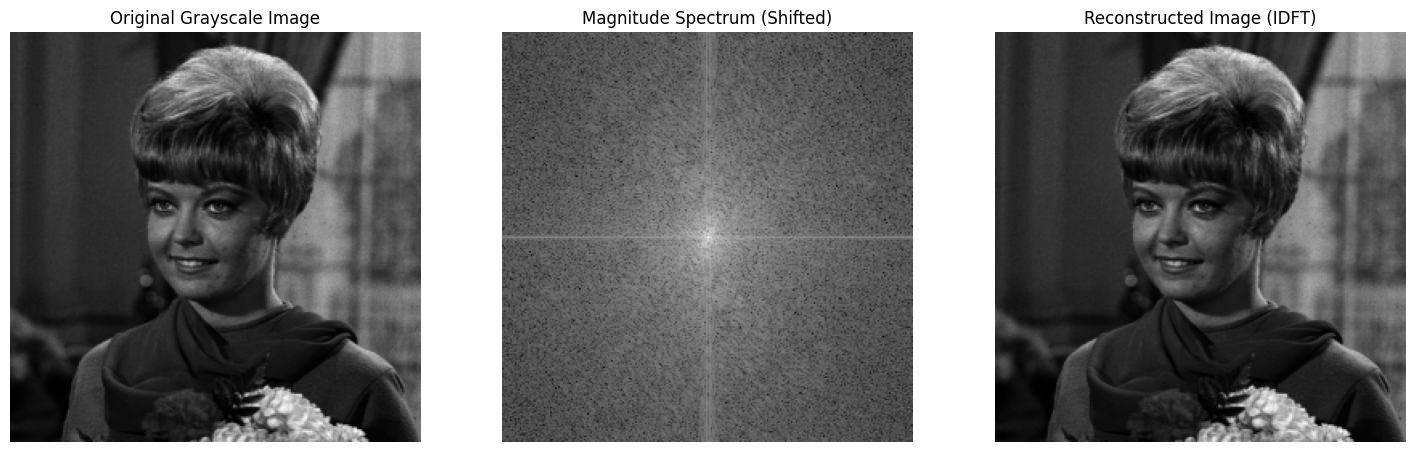

Core DFT functions defined and demonstrated.


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dft2d(img_gray):
    """
    Performs 2D Discrete Fourier Transform (DFT) on a grayscale image.
    Args:
        img_gray (np.array): A grayscale image (NumPy array).
    Returns:
        np.array: The 2D DFT result, a complex array.
    """
    # Convert the image to float32
    img_float32 = np.float32(img_gray)
    # Perform 2D DFT with COMPLEX_OUTPUT flag
    dft_result = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    return dft_result

def shift_dft(dft_result):
    """
    Shifts the zero-frequency component to the center of the spectrum.
    Args:
        dft_result (np.array): The 2D DFT result (complex array).
    Returns:
        np.array: The shifted 2D DFT result.
    """
    # Rearrange the quadrants of the Fourier transform
    shifted_dft = np.fft.fftshift(dft_result)
    return shifted_dft

def idft2d(shifted_dft_result):
    """
    Performs Inverse 2D Discrete Fourier Transform (IDFT).
    Args:
        shifted_dft_result (np.array): The shifted 2D DFT result (complex array),
                                     potentially filtered.
    Returns:
        np.array: The reconstructed image (real part), scaled to original intensity range.
    """
    # Perform inverse shift
    unshifted_dft = np.fft.ifftshift(shifted_dft_result)
    # Perform 2D IDFT with DFT_SCALE and DFT_REAL_OUTPUT flags
    idft_result = cv2.dft(unshifted_dft, flags=cv2.DFT_INVERSE | cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
    return idft_result



# Ensure img_rgb exists from previous steps, if not, handle it
if 'img_rgb' in locals() and img_rgb is not None:
    # Convert the loaded RGB image to grayscale for DFT processing
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    # 1. Perform 2D DFT
    dft_output = dft2d(img_gray)

    # 2. Shift the zero-frequency component
    shifted_dft_output = shift_dft(dft_output)

    # Calculate the magnitude spectrum for visualization
    magnitude_spectrum = 20 * np.log(cv2.magnitude(shifted_dft_output[:,:,0], shifted_dft_output[:,:,1]))

    # 3. Perform Inverse 2D DFT to reconstruct the image
    reconstructed_image = idft2d(shifted_dft_output)

    # Display the original grayscale, magnitude spectrum, and reconstructed images
    plt.figure(figsize=(18, 6))

    plt.subplot(131)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum (Shifted)')
    plt.axis('off')

    plt.subplot(133)
    # Scale the reconstructed image to 0-255 for proper display
    reconstructed_image_display = cv2.normalize(reconstructed_image, None, 0, 255, cv2.NORM_MINMAX)
    reconstructed_image_display = np.uint8(reconstructed_image_display)
    plt.imshow(reconstructed_image_display, cmap='gray')
    plt.title('Reconstructed Image (IDFT)')
    plt.axis('off')

    plt.show()

    print("Core DFT functions defined and demonstrated.")
else:
    print("Error: img_rgb not found. Please ensure the image loading step was successful.")
    print("Cannot demonstrate DFT functions without a loaded image.")


Applying low-pass filters...


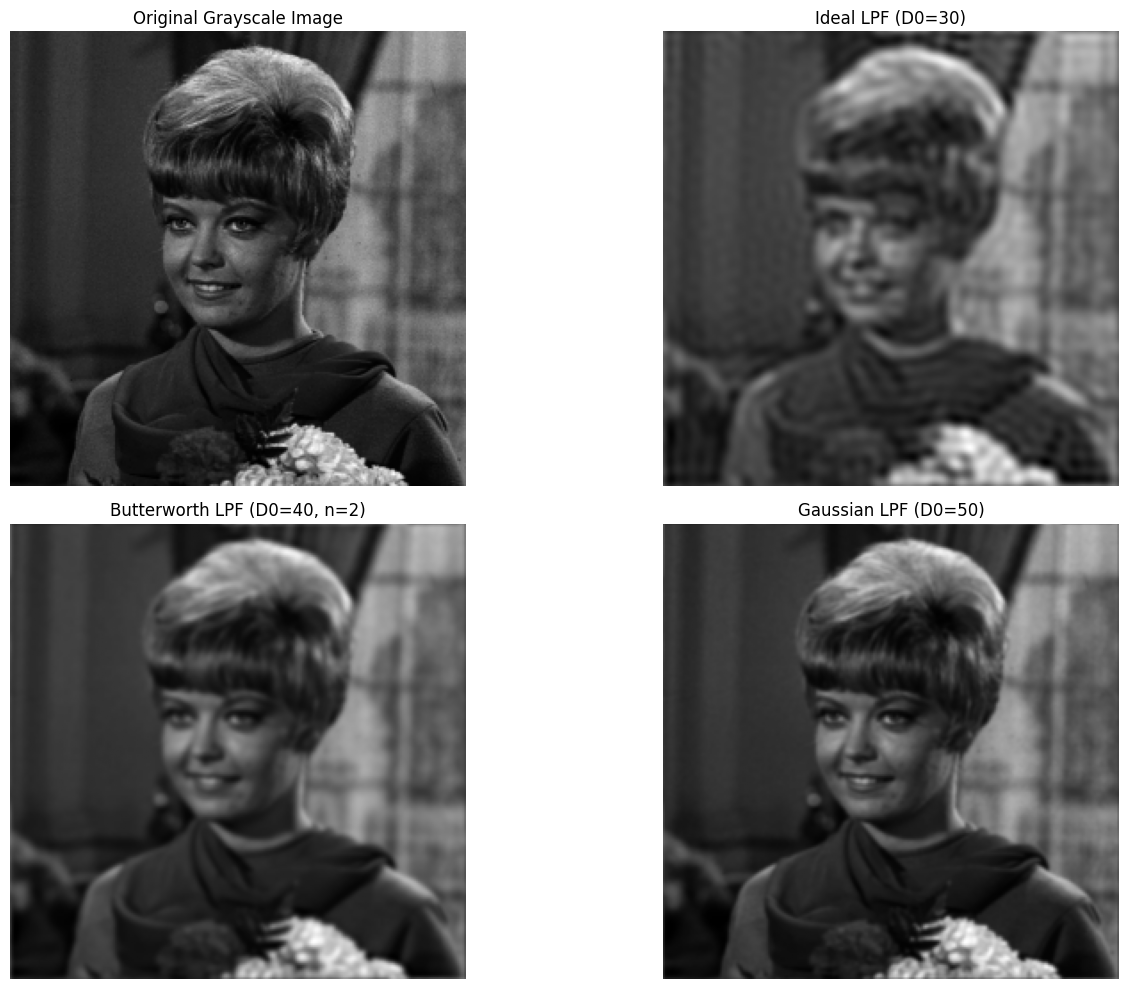

Low-pass filtering functions defined and demonstrated successfully.


In [11]:
def create_ideal_lowpass_filter(rows, cols, D0):
    """
    Creates an Ideal Low-Pass Filter (ILPF) mask.
    Args:
        rows (int): Number of rows in the filter mask.
        cols (int): Number of columns in the filter mask.
        D0 (float): Cutoff frequency (radius).
    Returns:
        np.array: The ILPF mask.
    """
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance <= D0:
                mask[i, j] = 1
    return mask

def create_butterworth_lowpass_filter(rows, cols, D0, n):
    """
    Creates a Butterworth Low-Pass Filter (BLPF) mask.
    Args:
        rows (int): Number of rows in the filter mask.
        cols (int): Number of columns in the filter mask.
        D0 (float): Cutoff frequency.
        n (int): Order of the Butterworth filter.
    Returns:
        np.array: The BLPF mask.
    """
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            mask[i, j] = 1 / (1 + (distance / D0)**(2 * n))
    return mask

def create_gaussian_lowpass_filter(rows, cols, D0):
    """
    Creates a Gaussian Low-Pass Filter (GLPF) mask.
    Args:
        rows (int): Number of rows in the filter mask.
        cols (int): Number of columns in the filter mask.
        D0 (float): Cutoff frequency (standard deviation).
    Returns:
        np.array: The GLPF mask.
    """
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = (i - center_row)**2 + (j - center_col)**2
            mask[i, j] = np.exp(-(distance) / (2 * D0**2))
    return mask


def apply_filter(shifted_dft, filter_mask):
    """
    Applies a filter mask to the shifted DFT and performs the inverse DFT.
    Args:
        shifted_dft (np.array): The shifted 2D DFT result (complex array).
        filter_mask (np.array): The filter mask (real array).
    Returns:
        np.array: The filtered image in the spatial domain.
    """
    # Ensure the filter mask has two channels for complex multiplication
    filter_mask_complex = np.stack([filter_mask, filter_mask], axis=-1)
    filtered_shifted_dft = shifted_dft * filter_mask_complex
    filtered_image = idft2d(filtered_shifted_dft)
    # Normalize to 0-255 for display
    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(filtered_image)


# --- Demonstration of Low-Pass Filters ---

if 'img_rgb' in locals() and img_rgb is not None:
    print("Applying low-pass filters...")
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    rows, cols = img_gray.shape

    # Perform DFT and shift
    dft_output = dft2d(img_gray)
    shifted_dft_output = shift_dft(dft_output)

    # Define cutoff frequencies for demonstration
    D0_ideal = 30
    D0_butterworth = 40
    n_butterworth = 2 # Order for Butterworth
    D0_gaussian = 50

    # Create and apply Ideal Low-Pass Filter
    ilpf_mask = create_ideal_lowpass_filter(rows, cols, D0_ideal)
    img_ilpf = apply_filter(shifted_dft_output, ilpf_mask)

    # Create and apply Butterworth Low-Pass Filter
    blpf_mask = create_butterworth_lowpass_filter(rows, cols, D0_butterworth, n_butterworth)
    img_blpf = apply_filter(shifted_dft_output, blpf_mask)

    # Create and apply Gaussian Low-Pass Filter
    glpf_mask = create_gaussian_lowpass_filter(rows, cols, D0_gaussian)
    img_glpf = apply_filter(shifted_dft_output, glpf_mask)

    # Display results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(img_ilpf, cmap='gray')
    plt.title(f'Ideal LPF (D0={D0_ideal})')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(img_blpf, cmap='gray')
    plt.title(f'Butterworth LPF (D0={D0_butterworth}, n={n_butterworth})')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(img_glpf, cmap='gray')
    plt.title(f'Gaussian LPF (D0={D0_gaussian})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("Low-pass filtering functions defined and demonstrated successfully.")
else:
    print("Error: img_rgb not found. Please ensure the image loading step was successful before running this cell.")


**Reasoning**:
I need to add a code cell that defines functions for creating Ideal, Butterworth, and Gaussian high-pass filters, and then demonstrates their application to an image to fulfill the subtask requirements.



Applying high-pass filters...


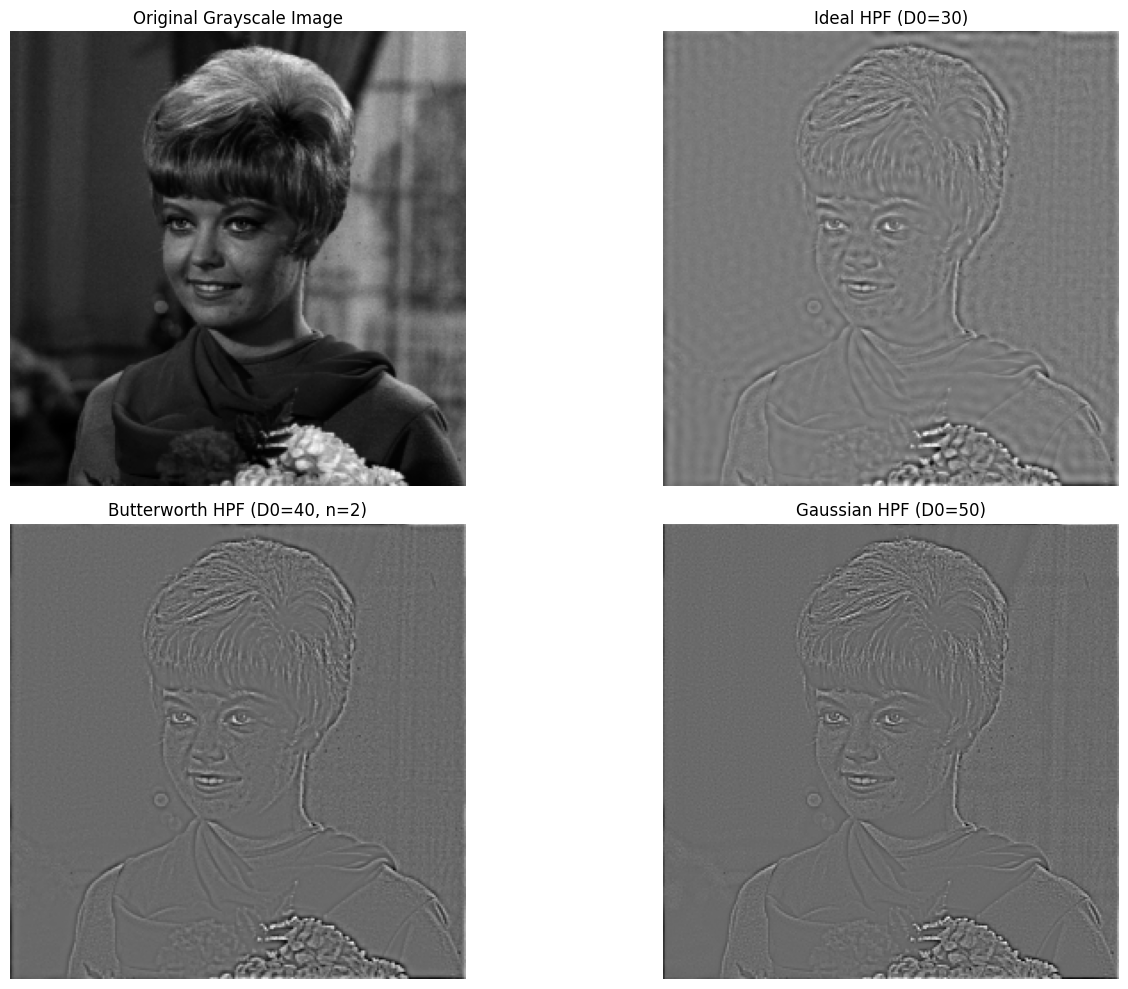

High-pass filtering functions defined and demonstrated successfully.


In [12]:
def create_ideal_highpass_filter(rows, cols, D0):
    """
    Creates an Ideal High-Pass Filter (IHPF) mask.
    Args:
        rows (int): Number of rows in the filter mask.
        cols (int): Number of columns in the filter mask.
        D0 (float): Cutoff frequency (radius).
    Returns:
        np.array: The IHPF mask.
    """
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32) # Start with all 1s
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance <= D0:
                mask[i, j] = 0 # Attenuate low frequencies
    return mask

def create_butterworth_highpass_filter(rows, cols, D0, n):
    """
    Creates a Butterworth High-Pass Filter (BHPF) mask.
    Args:
        rows (int): Number of rows in the filter mask.
        cols (int): Number of columns in the filter mask.
        D0 (float): Cutoff frequency.
        n (int): Order of the Butterworth filter.
    Returns:
        np.array: The BHPF mask.
    """
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance == 0: # Avoid division by zero at the center
                mask[i, j] = 0
            else:
                mask[i, j] = 1 / (1 + (D0 / distance)**(2 * n))
    return mask

def create_gaussian_highpass_filter(rows, cols, D0):
    """
    Creates a Gaussian High-Pass Filter (GHPF) mask.
    Args:
        rows (int): Number of rows in the filter mask.
        cols (int): Number of columns in the filter mask.
        D0 (float): Cutoff frequency (standard deviation).
    Returns:
        np.array: The GHPF mask.
    """
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = (i - center_row)**2 + (j - center_col)**2
            mask[i, j] = 1 - np.exp(-(distance) / (2 * D0**2))
    return mask


# --- Demonstration of High-Pass Filters ---

if 'img_rgb' in locals() and img_rgb is not None:
    print("Applying high-pass filters...")
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    rows, cols = img_gray.shape

    # Perform DFT and shift
    dft_output = dft2d(img_gray)
    shifted_dft_output = shift_dft(dft_output)

    # Define cutoff frequencies and order for demonstration
    D0_ideal_hp = 30
    D0_butterworth_hp = 40
    n_butterworth_hp = 2 # Order for Butterworth
    D0_gaussian_hp = 50

    # Create and apply Ideal High-Pass Filter
    ihpf_mask = create_ideal_highpass_filter(rows, cols, D0_ideal_hp)
    img_ihpf = apply_filter(shifted_dft_output, ihpf_mask)

    # Create and apply Butterworth High-Pass Filter
    bhpf_mask = create_butterworth_highpass_filter(rows, cols, D0_butterworth_hp, n_butterworth_hp)
    img_bhpf = apply_filter(shifted_dft_output, bhpf_mask)

    # Create and apply Gaussian High-Pass Filter
    ghpf_mask = create_gaussian_highpass_filter(rows, cols, D0_gaussian_hp)
    img_ghpf = apply_filter(shifted_dft_output, ghpf_mask)

    # Display results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(img_ihpf, cmap='gray')
    plt.title(f'Ideal HPF (D0={D0_ideal_hp})')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(img_bhpf, cmap='gray')
    plt.title(f'Butterworth HPF (D0={D0_butterworth_hp}, n={n_butterworth_hp})')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(img_ghpf, cmap='gray')
    plt.title(f'Gaussian HPF (D0={D0_gaussian_hp})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("High-pass filtering functions defined and demonstrated successfully.")
else:
    print("Error: img_rgb not found. Please ensure the image loading step was successful before running this cell.")

Processing image with various filters and displaying results...


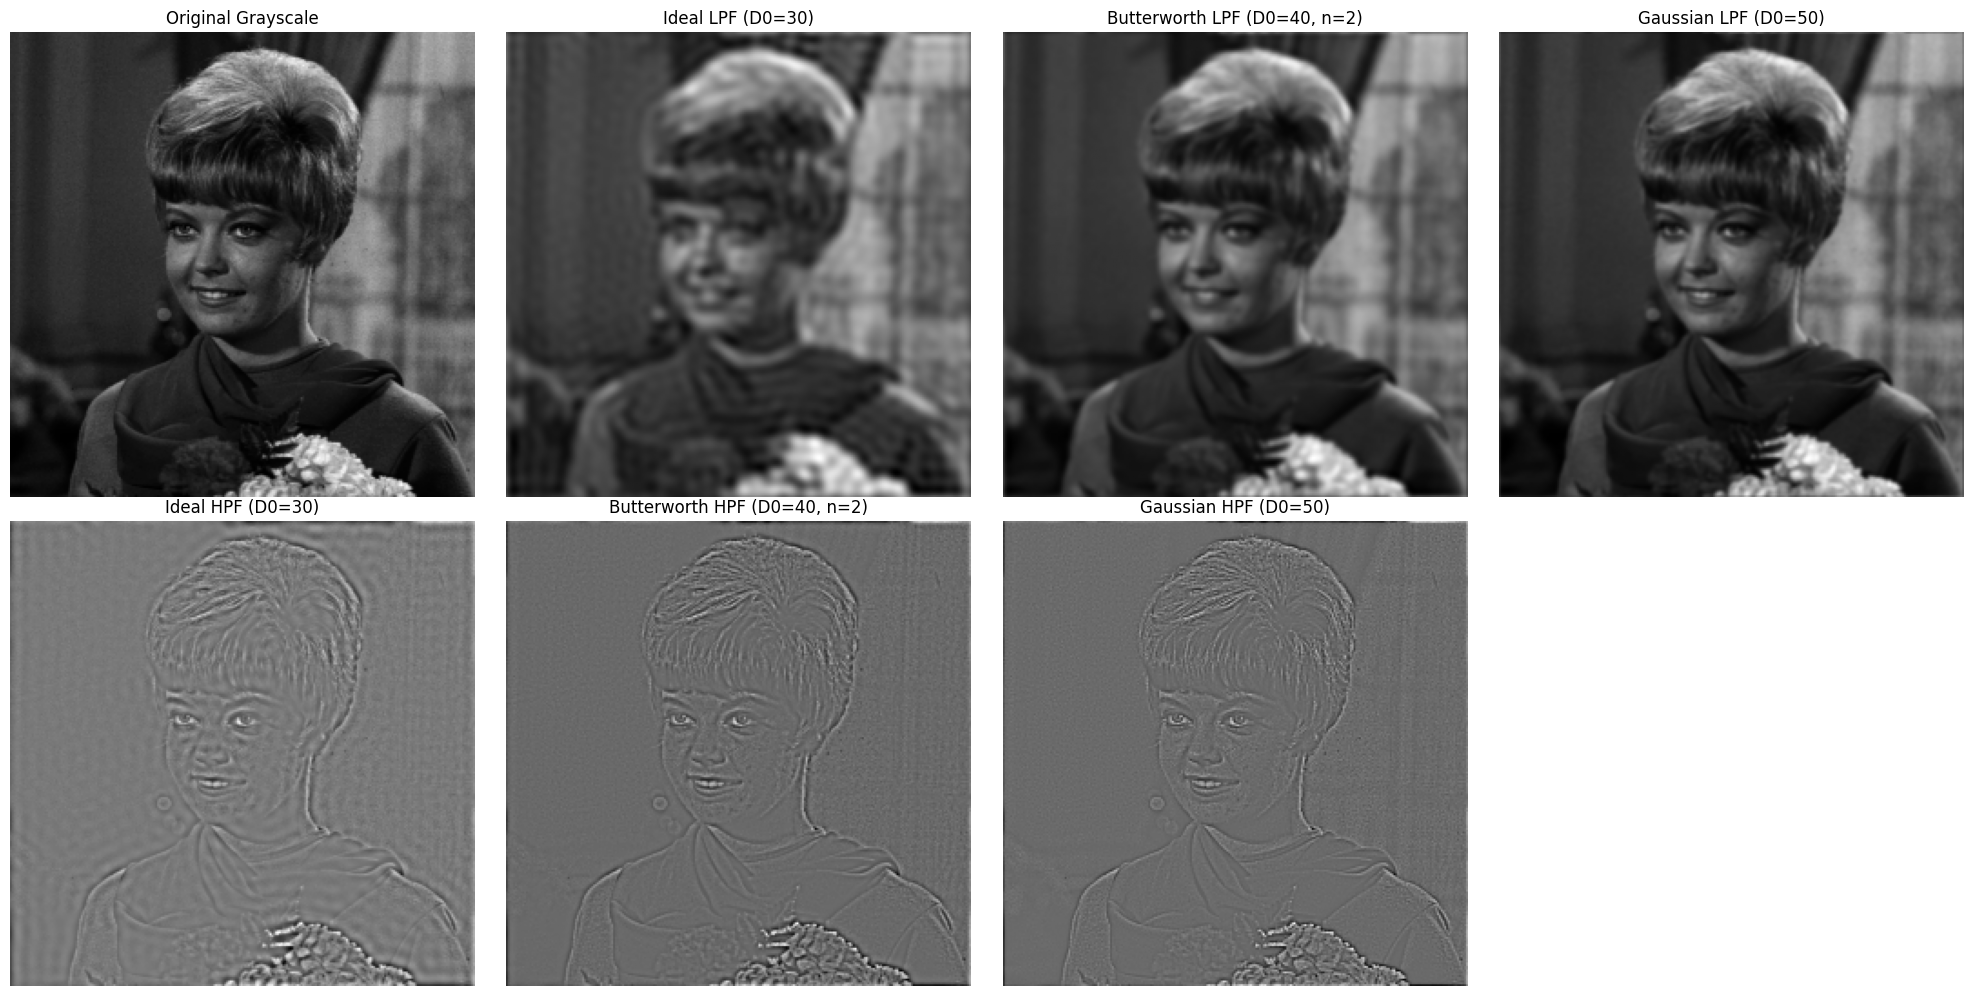

All filtering operations completed and results displayed for comparison.


In [13]:
if 'img_rgb' in locals() and img_rgb is not None:
    print("Processing image with various filters and displaying results...")
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    rows, cols = img_gray.shape

    # Perform DFT and shift
    dft_output = dft2d(img_gray)
    shifted_dft_output = shift_dft(dft_output)

    # --- Define filter parameters ---
    # Low-Pass Filter parameters
    D0_ideal_lp = 30
    D0_butterworth_lp = 40
    n_butterworth_lp = 2
    D0_gaussian_lp = 50

    # High-Pass Filter parameters
    D0_ideal_hp = 30
    D0_butterworth_hp = 40
    n_butterworth_hp = 2
    D0_gaussian_hp = 50

    # --- Apply Low-Pass Filters ---
    ilpf_mask = create_ideal_lowpass_filter(rows, cols, D0_ideal_lp)
    img_ilpf = apply_filter(shifted_dft_output, ilpf_mask)

    blpf_mask = create_butterworth_lowpass_filter(rows, cols, D0_butterworth_lp, n_butterworth_lp)
    img_blpf = apply_filter(shifted_dft_output, blpf_mask)

    glpf_mask = create_gaussian_lowpass_filter(rows, cols, D0_gaussian_lp)
    img_glpf = apply_filter(shifted_dft_output, glpf_mask)

    # --- Apply High-Pass Filters ---
    ihpf_mask = create_ideal_highpass_filter(rows, cols, D0_ideal_hp)
    img_ihpf = apply_filter(shifted_dft_output, ihpf_mask)

    bhpf_mask = create_butterworth_highpass_filter(rows, cols, D0_butterworth_hp, n_butterworth_hp)
    img_bhpf = apply_filter(shifted_dft_output, bhpf_mask)

    ghpf_mask = create_gaussian_highpass_filter(rows, cols, D0_gaussian_hp)
    img_ghpf = apply_filter(shifted_dft_output, ghpf_mask)

    # --- Display results ---
    plt.figure(figsize=(20, 10))

    plt.subplot(2, 4, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.imshow(img_ilpf, cmap='gray')
    plt.title(f'Ideal LPF (D0={D0_ideal_lp})')
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.imshow(img_blpf, cmap='gray')
    plt.title(f'Butterworth LPF (D0={D0_butterworth_lp}, n={n_butterworth_lp})')
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.imshow(img_glpf, cmap='gray')
    plt.title(f'Gaussian LPF (D0={D0_gaussian_lp})')
    plt.axis('off')

    plt.subplot(2, 4, 5)
    plt.imshow(img_ihpf, cmap='gray')
    plt.title(f'Ideal HPF (D0={D0_ideal_hp})')
    plt.axis('off')

    plt.subplot(2, 4, 6)
    plt.imshow(img_bhpf, cmap='gray')
    plt.title(f'Butterworth HPF (D0={D0_butterworth_hp}, n={n_butterworth_hp})')
    plt.axis('off')

    plt.subplot(2, 4, 7)
    plt.imshow(img_ghpf, cmap='gray')
    plt.title(f'Gaussian HPF (D0={D0_gaussian_hp})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("All filtering operations completed and results displayed for comparison.")
else:
    print("Error: img_rgb not found. Please go back to the image loading cell, ensure 'image_path' is correct, and re-run previous cells.")
    print("Cannot proceed with filtering and comparison without a loaded image.")


## 1. Introduction

This notebook explores frequency domain image processing techniques for blurring and sharpening. We will delve into the theoretical foundations of the Fourier Transform, implement core DFT functionalities, and apply various low-pass (Butterworth, Gaussian, Ideal) and high-pass filters (Butterworth, Gaussian, Ideal) to an image. The aim is to demonstrate how these filters operate in the frequency domain to achieve different image manipulation effects, providing a comprehensive comparison of their characteristics and visual outcomes. This hands-on approach will cover the essential steps from image loading and DFT computation to filter design and inverse transformation, culminating in a discussion of the results and real-world applications.

## 2. Methodology

Our approach to frequency domain image processing involves several key steps:

1.  **Image Loading and Preprocessing**: An image is loaded from Google Drive. It is then converted from its original color format (BGR/RGB) to grayscale, as the Fourier Transform is typically applied to single-channel images. For proper DFT computation, the image data type is converted to `np.float32`.

2.  **Discrete Fourier Transform (DFT)**: The 2D DFT is applied to the grayscale image. This transforms the image from the spatial domain to the frequency domain, where pixel intensities are represented by frequency components.

3.  **Frequency Spectrum Shifting**: The zero-frequency component (DC component) of the DFT output is shifted to the center of the spectrum. This makes the magnitude spectrum easier to visualize and interpret, as low frequencies (representing general image structure) are at the center, and high frequencies (representing details and edges) are at the periphery.

4.  **Filter Design (Low-Pass and High-Pass)**: We implement three types of low-pass filters (Ideal, Butterworth, Gaussian) and three types of high-pass filters (Ideal, Butterworth, Gaussian). These filters are mathematical functions applied as masks in the frequency domain:
    *   **Ideal Filters**: These filters have a sharp cutoff, either completely passing or completely blocking frequencies based on a specified cutoff frequency $D_0$.
    *   **Butterworth Filters**: These filters offer a smoother transition between passed and blocked frequencies, controlled by a cutoff frequency $D_0$ and an order $n$. Higher orders result in sharper transitions.
    *   **Gaussian Filters**: These filters provide the smoothest transition, resembling a Gaussian curve, also controlled by a cutoff frequency $D_0$.

5.  **Filter Application**: The designed filter mask is multiplied element-wise with the shifted Fourier transform of the image. This modifies the frequency components according to the filter's characteristics.

6.  **Inverse DFT (IDFT)**: After filtering, an inverse shift is performed to move the zero-frequency component back to its original position. Then, the 2D Inverse Discrete Fourier Transform (IDFT) is applied to transform the image back from the frequency domain to the spatial domain. The resulting image is normalized and converted to `uint8` for display.

7.  **Visualization and Comparison**: The original image, along with the blurred images (from low-pass filters) and sharpened images (from high-pass filters), are displayed side-by-side using Matplotlib to visually compare the effects of different filter types and parameters.

## 3. Discussion of Results

### Low-Pass Filters (Blurring)

Low-pass filters are used to blur images by attenuating high-frequency components, which correspond to sharp edges and fine details, while preserving low-frequency components representing smooth regions. We observed the following effects with different low-pass filter types:

*   **Ideal Low-Pass Filter (ILPF)**:
    *   **Effect**: Produces significant blurring. However, its sharp cutoff in the frequency domain leads to a phenomenon called "ringing" or Gibbs phenomenon in the spatial domain. This manifests as ripples or oscillations around sharp edges in the blurred image.
    *   **Strengths**: Conceptually simple to understand.
    *   **Limitations**: Introduces noticeable ringing artifacts, which are often undesirable.
    *   **Parameter (D0)**: A smaller $D_0$ (cutoff frequency) results in more blurring and more pronounced ringing, as more high frequencies are abruptly cut off.

*   **Butterworth Low-Pass Filter (BLPF)**:
    *   **Effect**: Provides smoother blurring compared to the Ideal filter, with reduced ringing artifacts. The transition from passband to stopband is gradual.
    *   **Strengths**: Offers a good trade-off between blurring effectiveness and artifact reduction. The smoothness can be controlled.
    *   **Limitations**: Can still exhibit some ringing, especially with lower orders and very sharp transitions.
    *   **Parameters (D0, n)**: A smaller $D_0$ increases blurring. The order $n$ controls the steepness of the roll-off. A higher $n$ makes the filter sharper (more like an Ideal filter), increasing the potential for ringing, while a lower $n$ results in a smoother transition and less ringing.

*   **Gaussian Low-Pass Filter (GLPF)**:
    *   **Effect**: Produces the smoothest blurring effect, almost completely eliminating ringing artifacts. This is due to its very gradual transition in the frequency domain.
    *   **Strengths**: Excellent for smooth blurring without introducing artifacts. Mimics the human visual system's response to blurring.
    *   **Limitations**: The blurring can sometimes appear less controlled or aggressive than with Ideal or Butterworth filters for the same $D_0$.
    *   **Parameter (D0)**: A smaller $D_0$ (which acts as a standard deviation) results in more blurring, as the filter rolls off more quickly.

### High-Pass Filters (Sharpening)

High-pass filters enhance edges and fine details by attenuating low-frequency components and passing high-frequency components. This typically results in a sharpened appearance, but can also amplify noise. We observed the following effects with different high-pass filter types:

*   **Ideal High-Pass Filter (IHPF)**:
    *   **Effect**: Produces strong sharpening, but like its low-pass counterpart, it introduces significant ringing artifacts around edges due to its abrupt frequency cutoff. The sharpened image often has a very high contrast at edges.
    *   **Strengths**: Provides very strong edge enhancement.
    *   **Limitations**: Prone to severe ringing artifacts and can significantly amplify noise.
    *   **Parameter (D0)**: A larger $D_0$ (cutoff frequency) results in more aggressive sharpening and more pronounced ringing, as more low frequencies are abruptly cut off.

*   **Butterworth High-Pass Filter (BHPF)**:
    *   **Effect**: Offers a good balance between sharpening and artifact suppression. The sharpening is effective, and ringing is significantly less prominent than with the Ideal filter.
    *   **Strengths**: Adjustable sharpness with controlled ringing. More practical for many sharpening applications than the Ideal filter.
    *   **Limitations**: Can still exhibit some ringing or overshooting artifacts, especially at lower orders and sharp transitions.
    *   **Parameters (D0, n)**: A larger $D_0$ increases sharpening. A higher order $n$ makes the filter sharper, potentially increasing ringing, while a lower $n$ leads to a smoother enhancement with fewer artifacts.

*   **Gaussian High-Pass Filter (GHPF)**:
    *   **Effect**: Provides the most natural-looking sharpening, with minimal to no ringing artifacts. The edges are enhanced subtly and smoothly.
    *   **Strengths**: Excellent for noise-sensitive applications due to its smooth frequency response. Produces aesthetically pleasing sharpening.
    *   **Limitations**: The sharpening effect can be less pronounced compared to Ideal or Butterworth filters for similar $D_0$ values.
    *   **Parameter (D0)**: A larger $D_0$ (standard deviation) results in more pronounced sharpening, as a wider range of high frequencies are passed and low frequencies are attenuated more gradually.

### General Observations:

*   **Cutoff Frequency (D0)**: For low-pass filters, a smaller $D_0$ leads to more blurring. For high-pass filters, a larger $D_0$ leads to more sharpening. Choosing an appropriate $D_0$ is crucial and often image-dependent.
*   **Butterworth Order (n)**: Higher orders make Butterworth filters behave more like Ideal filters, resulting in sharper transitions but also increasing the likelihood of ringing artifacts. Lower orders provide smoother transitions and fewer artifacts.
*   **Artifacts**: Ideal filters are simple but introduce strong ringing. Gaussian filters are excellent for smooth operations without artifacts. Butterworth filters offer a tunable balance between the two.
*   **Image Type**: The effectiveness and perceived quality of the filters can vary greatly depending on the characteristics of the input image (e.g., presence of noise, sharpness of edges, dynamic range).

In summary, Gaussian filters generally provide the most visually pleasing results for both blurring and sharpening due to their smooth frequency response, minimizing undesirable artifacts. Butterworth filters offer a flexible alternative with adjustable sharpness and controlled ringing. Ideal filters, while demonstrating the concept clearly, are often impractical for real-world image enhancement due to their severe ringing effects.

## 4. Real-World Applications

Frequency domain image processing, utilizing the Fourier Transform and various filters, has a wide array of practical applications across different fields:

*   **Medical Imaging**: Filters are crucial for enhancing diagnostic images. Low-pass filters can be used for noise reduction in MRI or X-ray images, while high-pass filters can sharpen features like tumors or vessel boundaries for clearer visualization.
*   **Noise Reduction**: Undesired noise, often appearing as high-frequency components (e.g., salt-and-pepper noise) or periodic patterns (e.g., electrical interference), can be effectively removed or attenuated using low-pass filters or notch filters in the frequency domain.
*   **Image Enhancement and Restoration**: Sharpening filters (high-pass) are used to make blurry images clearer, enhance edges for better object recognition, or restore details lost during image acquisition. Conversely, blurring (low-pass) can be used for aesthetic effects or to prepare images for certain types of analysis by reducing fine details.
*   **Computer Vision and Machine Learning Preprocessing**: Images are often preprocessed using frequency domain techniques to simplify features, remove noise, or highlight relevant structures before being fed into machine learning models for tasks like object detection, segmentation, or classification.
*   **Security and Surveillance**: Enhancing details from low-quality surveillance footage or blurring sensitive information for privacy can be achieved through frequency domain filtering.
*   **Satellite and Aerial Imaging**: Processing satellite images to remove atmospheric haze (often a low-frequency component) or to enhance geological features (high-frequency) for mapping and analysis.
*   **Forensic Analysis**: Revealing hidden patterns or enhancing fingerprints in forensic images.
*   **Astronomy**: Cleaning noise from astronomical images to reveal fainter celestial objects or enhance planetary features.

## 5. Conclusion

This notebook successfully demonstrated the principles and practical application of frequency domain image processing for blurring and sharpening. We covered the theoretical foundation of the Fourier Transform, implemented core DFT functions, and applied various low-pass (Ideal, Butterworth, Gaussian) and high-pass (Ideal, Butterworth, Gaussian) filters. The comparative analysis highlighted the distinct characteristics of each filter type:

*   **Ideal Filters** provide abrupt transitions but suffer from significant ringing artifacts, making them less suitable for practical applications where visual quality is paramount.
*   **Butterworth Filters** offer a tunable balance between sharp transitions and artifact reduction, providing more control over the filtering process.
*   **Gaussian Filters** deliver the smoothest results, effectively minimizing ringing and producing visually pleasing blurred or sharpened images, often preferred in applications requiring natural-looking enhancements.

The exercise underscored the importance of selecting the appropriate filter and parameters (like cutoff frequency and filter order) based on the specific image processing goal and tolerance for artifacts. Understanding the frequency domain provides a powerful toolset for manipulating image features, from noise reduction and edge enhancement to advanced computer vision preprocessing, with vast applications across diverse fields.

Future work could involve exploring adaptive filtering techniques, comparing frequency domain methods with spatial domain counterparts (e.g., convolution kernels), or extending the analysis to color images by processing each channel independently. Further investigation into different cutoff frequency selection methods or automated parameter tuning could also enhance the practical utility of these filters.